In [12]:
%matplotlib inline 
import matplotlib.pylab as plt
import seaborn as sns
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures,load_robot_execution_failures
from tsfresh import extract_features,extract_relevant_features,select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

In [13]:
download_robot_execution_failures()
df,y=load_robot_execution_failures()
df.head()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


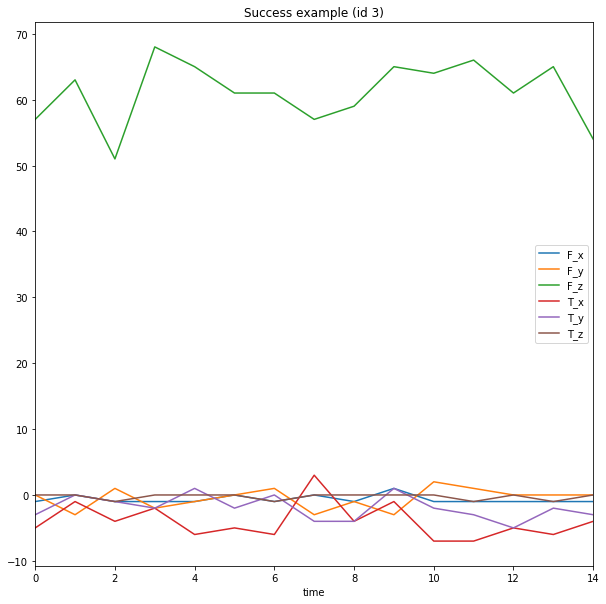

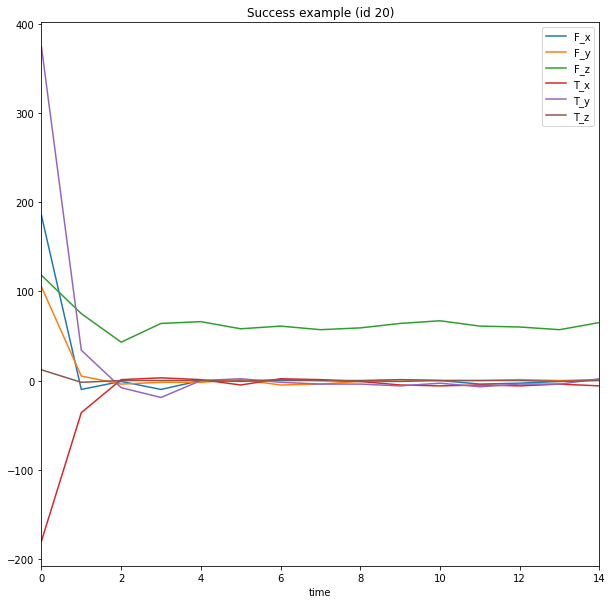

In [15]:
df[df.id==3][['time','F_x','F_y','F_z','T_x','T_y','T_z']].plot(x='time',title='Success example (id 3)',figsize=(10,10))
df[df.id==20][['time','F_x','F_y','F_z','T_x','T_y','T_z']].plot(x='time',title='Success example (id 20)',figsize=(10,10))

In [16]:
extraction_settings=ComprehensiveFCParameters()

In [18]:
X=extract_features(df,column_id='id',column_sort='time',
                  default_fc_parameters=extraction_settings,
                  impute_function=impute)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:12<00:00,  1.65it/s]
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...,
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [19]:
X.head()

variable,F_x__abs_energy,F_x__absolute_sum_of_changes,"F_x__agg_autocorrelation__f_agg_""mean""","F_x__agg_autocorrelation__f_agg_""median""","F_x__agg_autocorrelation__f_agg_""var""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,T_z__time_reversal_asymmetry_statistic__lag_1,T_z__time_reversal_asymmetry_statistic__lag_2,T_z__time_reversal_asymmetry_statistic__lag_3,T_z__value_count__value_-inf,T_z__value_count__value_0,T_z__value_count__value_1,T_z__value_count__value_inf,T_z__value_count__value_nan,T_z__variance,T_z__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,2.0,-0.106351,-7.206633e-02,0.016879,0.0,-1.0,-1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,15.0,0.0,0.0,0.0,0.000000,0.0
2,25.0,14.0,-0.039098,-4.935275e-02,0.088790,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,11.0,0.0,0.0,0.0,0.195556,0.0
3,12.0,10.0,-0.029815,1.301043e-17,0.105435,1.0,-1.0,-2.0,0.0,0.0,...,0.000000,-0.090909,0.000000,0.0,11.0,0.0,0.0,0.0,0.195556,0.0
4,16.0,17.0,-0.049773,-6.417112e-02,0.143580,1.0,-1.0,-1.0,0.0,0.0,...,0.000000,-0.181818,0.000000,0.0,8.0,1.0,0.0,0.0,0.355556,0.0
5,17.0,13.0,-0.061467,-5.172414e-02,0.052642,2.0,-1.0,-2.0,0.0,0.0,...,-0.076923,-0.090909,-0.222222,0.0,9.0,2.0,0.0,0.0,0.382222,0.0


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 1 to 88
Columns: 4764 entries, F_x__abs_energy to T_z__variance_larger_than_standard_deviation
dtypes: float64(4764)
memory usage: 3.2 MB


In [25]:
X_filtered=extract_relevant_features(df,y,
                                   column_id='id',column_sort='time',
                                    default_fc_parameters=extraction_settings)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:12<00:00,  1.63it/s]
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...,
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [27]:
X_filtered.head()

variable,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__standard_deviation,T_y__variance,"F_x__fft_coefficient__coeff_1__attr_""abs""","T_y__fft_coefficient__coeff_1__attr_""abs""",T_y__abs_energy,F_z__standard_deviation,"F_z__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""intercept""",...,T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9,"F_z__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","T_x__agg_autocorrelation__f_agg_""mean""","F_y__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8",T_x__spkt_welch_density__coeff_5,"T_y__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""","F_y__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.2","F_z__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_z__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.4"
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,15.0,13.0,0.471405,0.222222,1.000000,1.165352,10.0,1.203698,0.65,...,0.0,0.0,62.833333,-0.095589,0.209184,0.037795,-1.000000,0.000000,63.0,0.000000
2,25.0,13.0,76.0,2.054805,4.222222,0.624118,6.020261,90.0,4.333846,19.84,...,1.0,0.0,64.666667,-0.054604,0.000000,0.319311,-1.000000,0.222222,70.0,2.666667
3,12.0,14.0,40.0,1.768867,3.128889,2.203858,8.235442,103.0,4.616877,22.01,...,1.0,0.0,67.333333,-0.061050,0.000000,9.102780,-3.000000,0.250000,68.0,8.187500
4,16.0,10.0,60.0,2.669998,7.128889,0.844394,12.067855,124.0,3.833188,10.64,...,0.0,0.0,63.666667,-0.133794,1.555556,56.910262,-3.166667,1.360000,66.0,1.000000
5,17.0,13.0,46.0,2.039608,4.160000,2.730599,6.445330,180.0,4.841487,16.00,...,0.0,0.6,64.333333,-0.106108,0.000000,22.841805,-4.166667,1.040000,67.0,0.000000


In [28]:
X_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 1 to 88
Columns: 623 entries, F_x__abs_energy to F_z__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.4
dtypes: float64(623)
memory usage: 429.0 KB


In [33]:
X_train,X_test,X_filtered_train,X_filtered_test,y_train,y_test=train_test_split(X,X_filtered,y,test_size=4)

In [34]:
c1=DecisionTreeClassifier()
c1.fit(X_train,y_train)
print(classification_report(y_test,c1.predict(X_test)))

             precision    recall  f1-score   support

      False       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00         4



In [35]:
c1.n_features_

4764

In [36]:
c2=DecisionTreeClassifier()
c2.fit(X_filtered_train,y_train)
print(classification_report(y_test,c2.predict(X_filtered_test)))

             precision    recall  f1-score   support

      False       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00         4



In [37]:
c2.n_features_

623